<img width="300px" src="https://cachimbo.pe/wp-content/uploads/2022/10/1-19.jpg"></img>

#**Estadística con Python**
## **Tema: Regresión I**
#### **Docente: Giron Rene Omar A.**

---------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Universidad Ricardo Palma\MATEMÁTICA Y ESTADÍSTICA EN CIENCIA DE DATOS\codigo\base de datos\student_scores.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


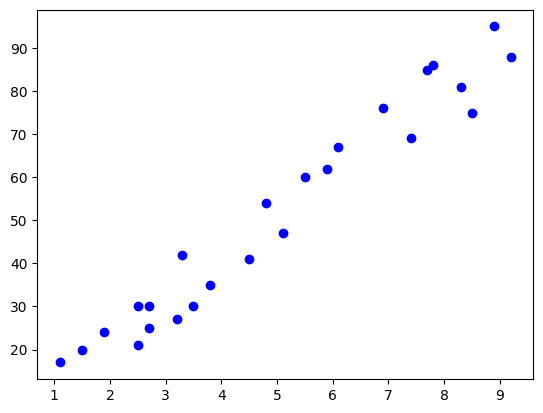

In [5]:
plt.scatter(df['Hours'], df['Scores'], color='blue')

## Método 1 (Fórmulas vistas en clases)

Intersección (β₀): 2.4837
Pendiente (β₁): 9.7758


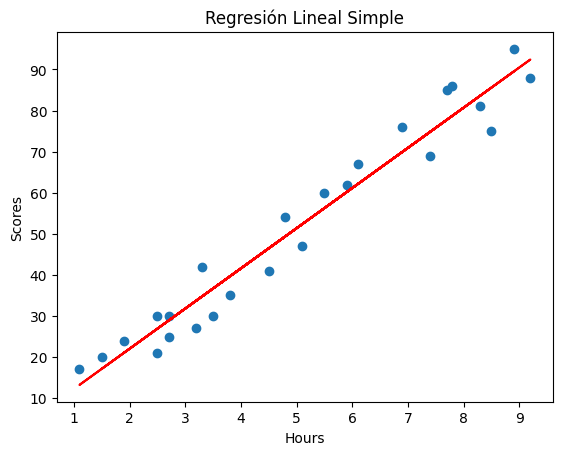

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(x, y):
    n = len(x)

    # Calcular medias
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calcular β₁ (pendiente)
    numerator = np.sum(x*y) - n * x_mean * y_mean
    denominator = np.sum(x**2) - n * x_mean**2
    beta_1 = numerator / denominator

    # Calcular β₀ (intersección)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1


# Ajustar la regresión lineal
beta_0, beta_1 = linear_regression(df['Hours'], df['Scores'])

# Imprimir resultados
print(f"Intersección (β₀): {beta_0:.4f}")
print(f"Pendiente (β₁): {beta_1:.4f}")

# Graficar los resultados
plt.scatter(df['Hours'], df['Scores'])
plt.plot(df['Hours'], beta_0 + beta_1 * df['Hours'], color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regresión Lineal Simple')
plt.show()

## Método 2 (Sklearn)

In [19]:
df['Hours']

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [20]:
df['Hours'].values.reshape(-1, 1)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

Intercepto: 2.48367340537321
Pendiente: 9.775803390787468


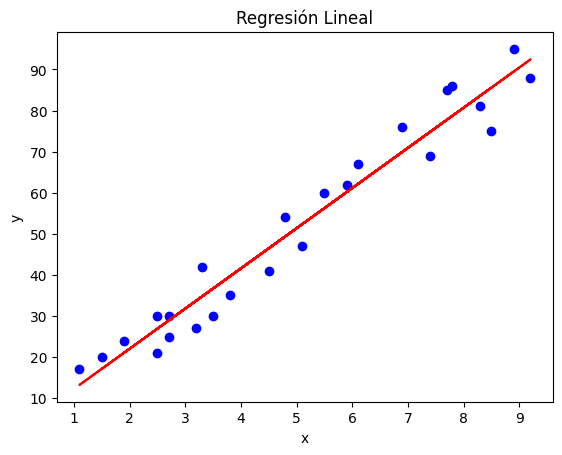

In [7]:
# Datos
x = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(x, y)

# Predicciones
y_pred = model.predict(x)

# Coeficientes
print(f'Intercepto: {model.intercept_}')
print(f'Pendiente: {model.coef_[0]}')

# Visualización
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.show()

## Método 3 (Statsmodels)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, kstest

# Ajustar el modelo de regresión lineal
X = sm.add_constant(df['Hours'])  # Agregar el término de intercepto
model = sm.OLS(df['Scores'], X).fit()

# Predicciones y residuos
df['predictions'] = model.predict(X)
df['residuals'] = df['Scores'] - df['predictions']

In [9]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           9.13e-17
Time:                        17:39:28   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

## Supuestos de la Regresión lineal

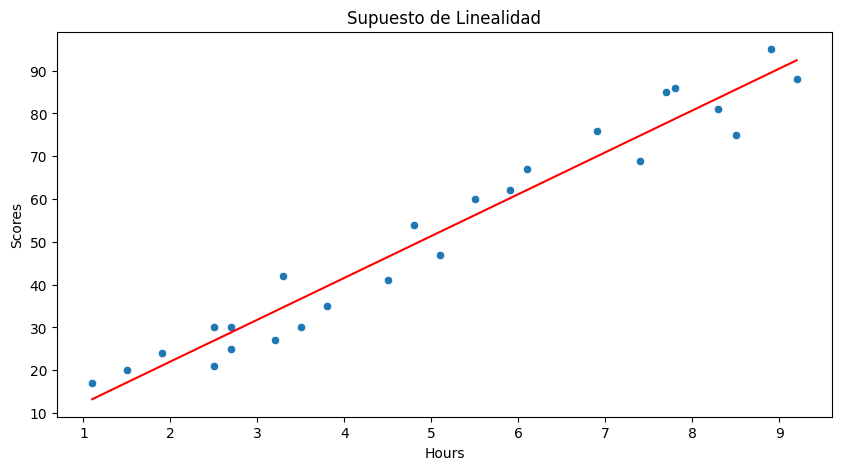

In [10]:
# Supuesto 1: Linealidad
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Hours', y='Scores', data=df)
sns.lineplot(x='Hours', y='predictions', data=df, color='red')
plt.title('Supuesto de Linealidad')
plt.show()

In [11]:
# Supuesto 2: Independencia (Prueba de Durbin-Watson) deba estar cercano a 2
dw_test = sm.stats.durbin_watson(df['residuals'])
print(f'Prueba de Durbin-Watson: {dw_test}')

Prueba de Durbin-Watson: 1.4601573762506714


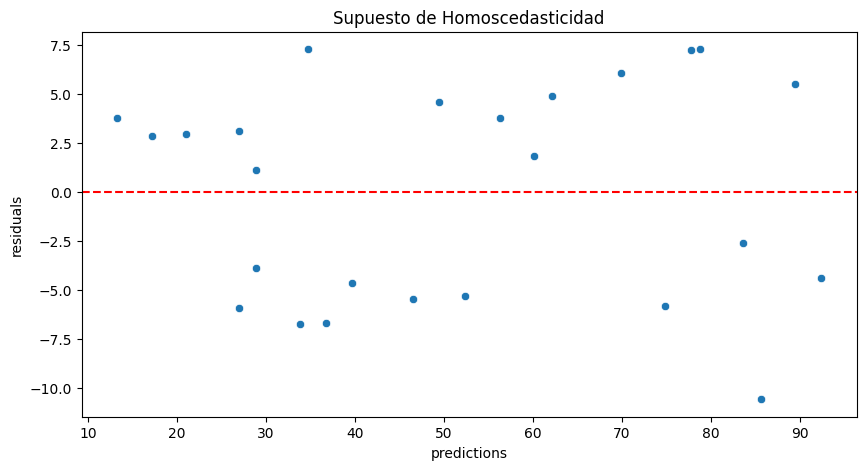

{'Lagrange multiplier statistic': 3.63588737136134, 'p-value': 0.05654645292698633, 'f-value': 3.9142936097992065, 'f p-value': 0.059975069620059995}


In [12]:
# Supuesto 3: Homoscedasticidad (Gráfico de residuos vs. predicciones)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='predictions', y='residuals', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Supuesto de Homoscedasticidad')
plt.show()

# Prueba de Breusch-Pagan para homoscedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(df['residuals'], X)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

<Figure size 1000x500 with 0 Axes>

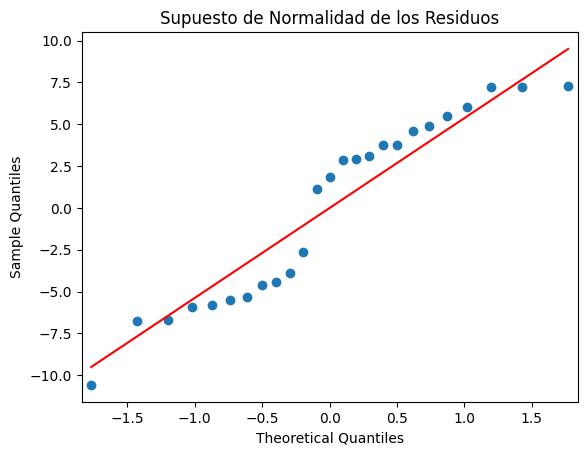

Prueba de Shapiro-Wilk: ShapiroResult(statistic=0.9040105538924625, pvalue=0.022455123744222715)
Prueba de Kolmogorov-Smirnov: KstestResult(statistic=0.48704877438192284, pvalue=5.481598499778136e-06, statistic_location=1.8390865889807486, statistic_sign=-1)


In [13]:
# Supuesto 4: Normalidad de los residuos (Q-Q plot y prueba de Shapiro-Wilk)
plt.figure(figsize=(10, 5))
sm.qqplot(df['residuals'], line='s')
plt.title('Supuesto de Normalidad de los Residuos')
plt.show()

shapiro_test = shapiro(df['residuals'])
print(f'Prueba de Shapiro-Wilk: {shapiro_test}')

# Alternativamente, prueba Kolmogorov-Smirnov
ks_test = kstest(df['residuals'], 'norm')
print(f'Prueba de Kolmogorov-Smirnov: {ks_test}')

# Regresión Logística

Un estudio quiere establecer un modelo que permita calcular la probabilidad de obtener una matrícula de honor al final del bachillerato en función de la nota que se ha obtenido en matemáticas. La variable matrícula está codificada como 0 si no se tiene matrícula y 1 si se tiene.

In [14]:
import pandas as pd

# Crear la lista de matrículas
matricula = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
             0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
             0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
             0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
             1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
             1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
             0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
             0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
             0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
             0, 0, 0, 0, 1, 0, 0, 0, 1, 1]

# Convertir matricula a tipo categórico (equivalente a factor en R)
matricula = pd.Categorical(matricula)

# Crear la lista de puntuaciones de matemáticas
matematicas = [41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
               51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
               63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
               63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
               50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
               57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
               72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
               57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
               56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
               58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
               53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
               63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
               53, 42, 60, 52, 38, 57, 58, 65]

# Crear el DataFrame
datos = pd.DataFrame({'matricula': matricula, 'matematicas': matematicas})

In [15]:
# Mostrar las primeras 4 filas
datos.head()

,matricula,matematicas
0,0,41
1,0,53
2,0,54
3,0,47
4,0,57


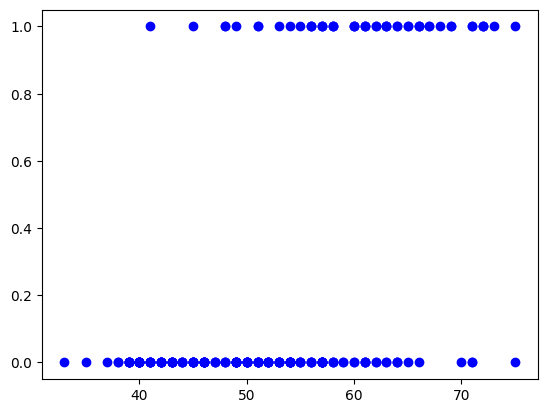

In [16]:
plt.scatter(datos['matematicas'], datos['matricula'], color='blue')

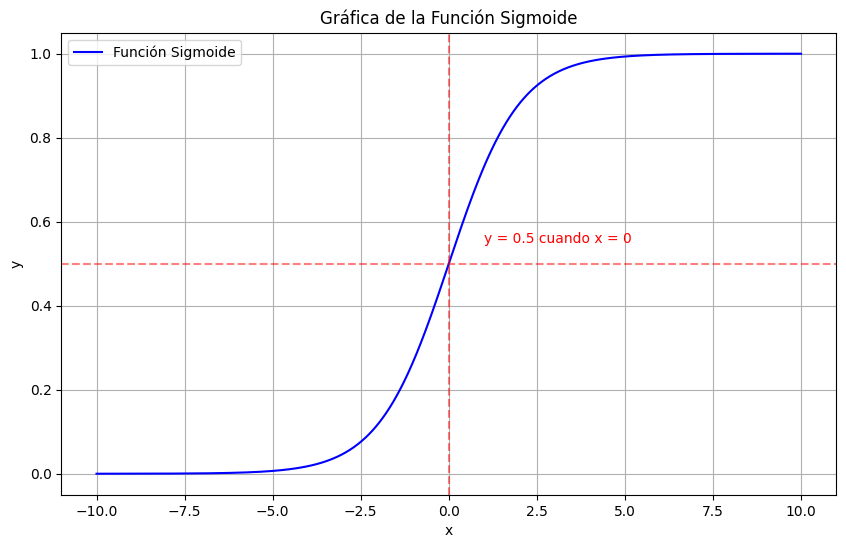

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Crear un rango de valores x
x = np.linspace(-10, 10, 1000)

# Calcular los valores y correspondientes
y = sigmoid(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b', label='Función Sigmoide')
plt.title('Gráfica de la Función Sigmoide')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# Añadir líneas para mostrar características clave
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.text(1, 0.55, 'y = 0.5 cuando x = 0', fontsize=10, color='r')

# Mostrar la gráfica
plt.show()


Matriz de Confusión:
[[140  11]
 [ 27  22]]


c:\Users\dg_su\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


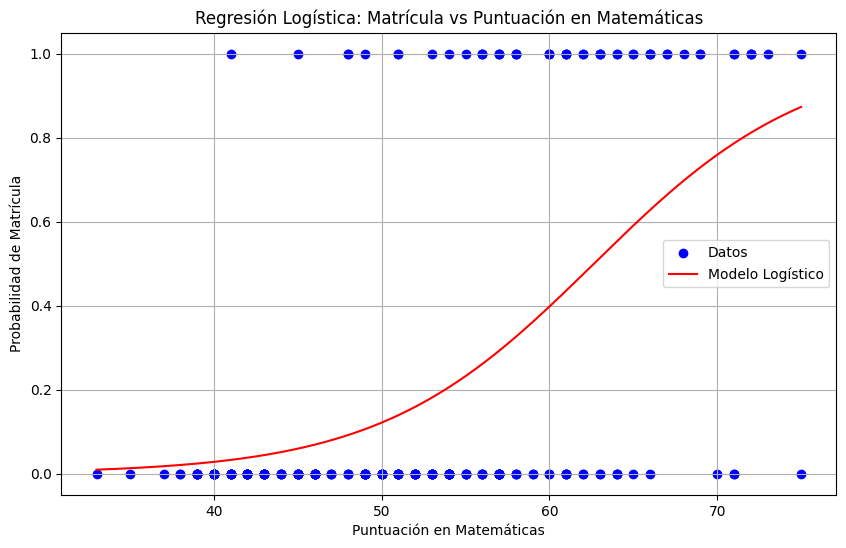


Coeficiente: 0.1562
Intercepto: -9.7881


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Separar las características (X) y la variable objetivo (y)
X = datos[['matematicas']]
y = datos['matricula']

# Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression()
# modelo.fit(X_train, y_train)
modelo.fit(X, y)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X)

# Imprimir el informe de clasificación y la matriz de confusión
# print("Informe de Clasificación:")
# print(classification_report(y, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y, y_pred))

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos')
plt.xlabel('Puntuación en Matemáticas')
plt.ylabel('Probabilidad de Matrícula')
plt.title('Regresión Logística: Matrícula vs Puntuación en Matemáticas')

# Generar puntos para la curva de regresión logística
X_range = np.linspace(X.min(), X.max(), 300)
y_proba = modelo.predict_proba(X_range.reshape(-1, 1))[:, 1]
plt.plot(X_range, y_proba, color='red', label='Modelo Logístico')

plt.legend()
plt.grid(True)
plt.show()

# Imprimir los coeficientes y el intercepto
print(f"\nCoeficiente: {modelo.coef_[0][0]:.4f}")
print(f"Intercepto: {modelo.intercept_[0]:.4f}")